## Avaliação - semana 15
### FSC5705 - Física Computacional
### 15/07/2024

Considere o circuito RC abaixo.

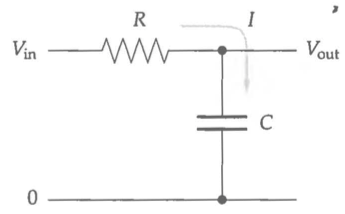

Este circuito funciona como um filtro, dada uma tensão de entrada $V_\text{in}(t)$, o circuito fornece uma tensão de saída $V_\text{out}(t)$. Vamos analisar este circuito e tentar determinar $V_\text{out}$ dada uma entrada $V_\text{in}$. Considere que a carga colocada em $V_\text{out}$ é de alta impedância, e a corrente que sai do circuito é desprezível. Isto é, a corrente que passa pelo resistor é a mesma que pelo capacitor.

Usando a lei das malhas,

$$
IR = V_\text{in}(t) - V_\text{out}.
$$

Por outro lado, no capacitor,

$$
I = \frac{\mathrm{d}Q}{\mathrm{d}t},\qquad Q = C V_\text{out}.
$$

Juntando estas equações, é fácil mostrar que

$$
 \frac{\mathrm{d}V_\text{out}}{\mathrm{d}t} = \frac{1}{RC} \left(V_\text{in}(t) - V_\text{out} \right).
$$

Nesta equação, $t$ é a variável independente, $V_\text{out}$ é a variável independente, e $V_\text{in}$ é uma função de $t$.

Para resolver esta equação, precisamos saber primeiro a tensão de entrada, $V_\text{in}(t)$. Vamos supor que temos uma onda retangular de frequência $\nu$, em $[\mathrm{Hz}]$, e amplitude $1\,\mathrm{V}$. Uma forma de descrever esta função matematicamente é

\begin{align}
V_\text{in}(t) = \left\{ \
\begin{array}{ll}
1\,\mathrm{V} \qquad &\text{se} \lfloor 2\nu t \rfloor \text{é par}, \\
-1\,\mathrm{V} \qquad &\text{se} \lfloor 2\nu t \rfloor \text{é ímpar},
\end{array}
\right .
\end{align}

onde $\lfloor x \rfloor$ é significa "$x$ arredondado para o inteiro imediatamente abaixo". Em python, podemos usar a função `np.floor()`. Abaixo, temos uma função chamada `Vin(t, nu)` que implementa esta onda retangular.

In [6]:
import numpy as np

def Vin(t, nu):
    if np.floor(2 * nu * t) % 2:
        return 1.0
    else:
        return -1.0

Vamos fazer o seu gráfico para uma frequência de $2\,\mathrm{Hz}$, com $t$ variando de $0$ até $3\,\mathrm{s}$.

In [9]:
nu = 2.0
ti = 0.0
tf = 3.0
N = 1000
h = (tf - ti) / N

t = np.zeros(N)
Vi = np.zeros(N)

for j in range(N):
    t[j] = ti + j * h
    Vi[j] = Vin(t[j], nu)

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

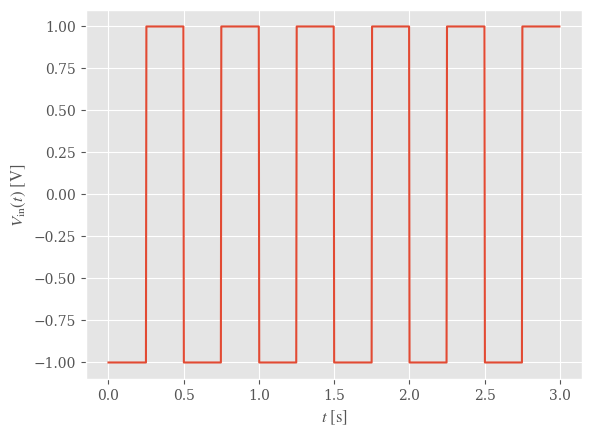

In [15]:
fig, ax = plt.subplots()
ax.plot(t, Vi)
ax.set_xlabel(r'$t\ [\mathrm{s}]$')
ax.set_ylabel(r'$V_\mathrm{in}(t)\ [\mathrm{V}]$')
plt.show()

#### Questão 1

Vamos escolher uma capacitância $C = 47\,\mathrm{nF}$, e uma resistência $R = 4.7\,\mathrm{k \Omega}$. Usando a função $V_\text{in}(t)$ definido acima, com uma frequência $\nu = 2000\,\mathrm{Hz}$, determine $V_\text{out}(t)$, com a condição inicial $V_\text{out}(0) = 0$. Calcule a solução deste problema de condições iniciais usando o método RK4 programado explicitamente.

A solução deverá ser uma função periódica, com período semelhante ao da tensão de entrada. Logo, é conveniente usar como passo de tempo $h$ uma fração pequena do período.

Faça o gráfico de $V_\text{in}(t)$ e $V_\text{out}(t)$ sobrepostos no mesmo subplot.

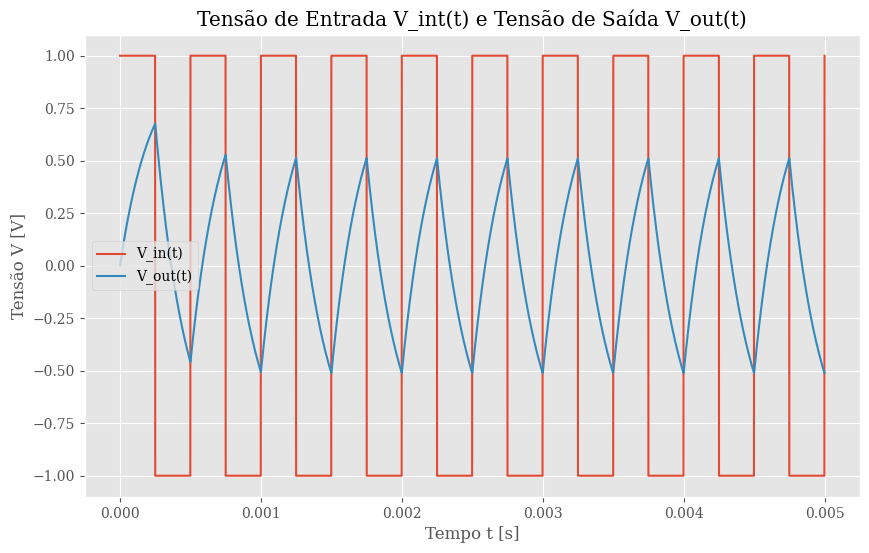

In [19]:
import numpy as np
import matplotlib.pyplot as plt

R = 4.7e3  #ohms
C = 47e-9  #farads
nu = 2000  #Hz

def Vin(t, nu):
    if np.floor(2 * nu * t) % 2 == 0:
        return 1.0
    else:
        return -1.0

def f(V_out, t):
    return (Vin(t, nu) - V_out) / (R * C)

V_out0 = 0.0
t0 = 0.0
tf = 5e-3
h = 1e-6
N = int((tf - t0) / h)

#arrays de tempo e V
t = np.linspace(t0, tf, N+1)
V_in = np.array([Vin(ti, nu) for ti in t])
V_out = np.zeros(N+1)
V_out[0] = V_out0

#runge-kutta de 4 Ordem
for j in range(1, N+1):
    k1 = h * f(V_out[j-1], t[j-1])
    k2 = h * f(V_out[j-1] + k1/2, t[j-1] + h/2)
    k3 = h * f(V_out[j-1] + k2/2, t[j-1] + h/2)
    k4 = h * f(V_out[j-1] + k3, t[j-1] + h)
    V_out[j] = V_out[j-1] + (k1 + 2*k2 + 2*k3 + k4)/6

#plotando no msemo grafico
plt.figure(figsize=(10, 6))
plt.plot(t, V_in, label = 'V_in(t)')
plt.plot(t, V_out, label= 'V_out(t)')
plt.xlabel('Tempo t [s]')
plt.ylabel('Tensão V [V]')
plt.title('Tensão de Entrada V_int(t) e Tensão de Saída V_out(t)')
plt.legend()
plt.grid(True)
plt.show()



#### Questão 2

Crie outra função para gerar uma tensão de entrada senoidal, isto é, $V^\prime_\text{in}(t) = \cos(2\pi \nu t)$. Encontre a solução do circuito, e faça o gráfico de entrada e saída no mesmo subplot, como o item acima. Teste o gráfico da solução para  $\nu = 200$, $800$ e $2000\,\mathrm{Hz}$.

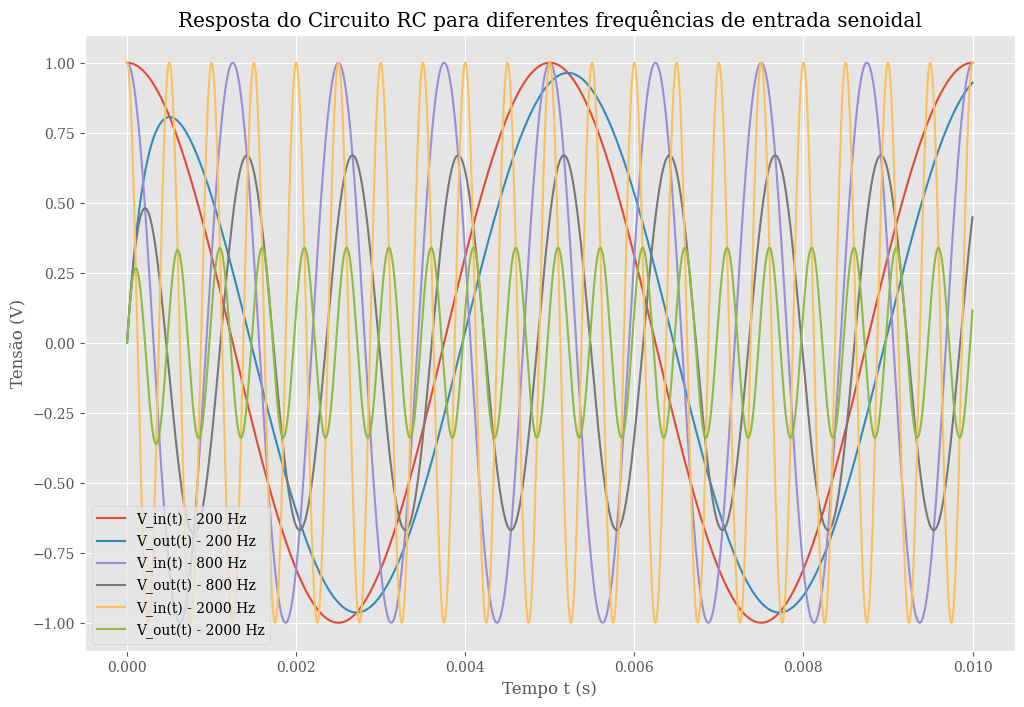

In [22]:
C = 47e-9  #farads
R = 4.7e3  #ohms

def V_in_sine(t, nu):
    return np.cos(2 * np.pi * nu * t)

def f(V_out, t, nu):
    return (V_in_sine(t, nu) - V_out) / (R * C)

def solve_circuit_rk4(nu, t0, tf, V_out0, h):
    N = int((tf - t0) / h)
    t = np.linspace(t0, tf, N+1)
    V_out_rk4 = np.zeros(N+1)
    V_out_rk4[0] = V_out0

    for j in range(1, N+1):
        k1 = h * f(V_out_rk4[j-1], t[j-1], nu)
        k2 = h * f(V_out_rk4[j-1] + k1/2, t[j-1] + h/2, nu)
        k3 = h * f(V_out_rk4[j-1] + k2/2, t[j-1] + h/2, nu)
        k4 = h * f(V_out_rk4[j-1] + k3, t[j-1] + h, nu)
        V_out_rk4[j] = V_out_rk4[j-1] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t, V_out_rk4

t0 = 0.0
tf = 0.01
V_out0 = 0.0
h = 1e-6

frequencies = [200, 800, 2000]

#plot

plt.figure(figsize=(12, 8))

for nu in frequencies:
    t, V_out_rk4 = solve_circuit_rk4(nu, t0, tf, V_out0, h)
    V_in_values = V_in_sine(t, nu)

    plt.plot(t, V_in_values, label=f'V_in(t) - {nu} Hz')
    plt.plot(t, V_out_rk4, label=f'V_out(t) - {nu} Hz')

plt.xlabel('Tempo t (s)')
plt.ylabel('Tensão (V)')
plt.title('Resposta do Circuito RC para diferentes frequências de entrada senoidal')
plt.legend()
plt.grid(True)
plt.show()


### Questão 3

Este é um circuito RC agindo como um filtro *passa-baixa*. Verifique se a amplitude da tensão de saída é atenuada da forma esperada, quando se varia a frequência. No caso de uma onda senoidal,

\begin{align}
\frac{V_\mathrm{out}}{V_\mathrm{in}} = \frac{X_\mathrm{C}}{\sqrt{R^2 + X_\mathrm{C}^2}}, \\
X_\mathrm{C} = \frac 1 {2 \pi \nu C},
\end{align}

onde $X_{\mathrm{C}}$ é a reatância capacitiva do capacitor $C$ e $V_\mathrm{in}$ e $V_\mathrm{out}$ são os valores médios quadráticos (RMS) da tensão de entrada e de saída.

Calcule os valores RMS da solução que você calculou, e compare com o valor esperado. Certifique-se de calcular a solução por vários períodos, para ter mais precisão na média.

Frequência: 200 Hz
V_in RMS: 0.7071
V_out RMS: 0.6600
V_out RMS Teórico: 0.9636
Erro: 0.3035

Frequência: 800 Hz
V_in RMS: 0.7071
V_out RMS: 0.4661
V_out RMS Teórico: 0.6692
Erro: 0.2031

Frequência: 2000 Hz
V_in RMS: 0.7071
V_out RMS: 0.2387
V_out RMS Teórico: 0.3389
Erro: 0.1002



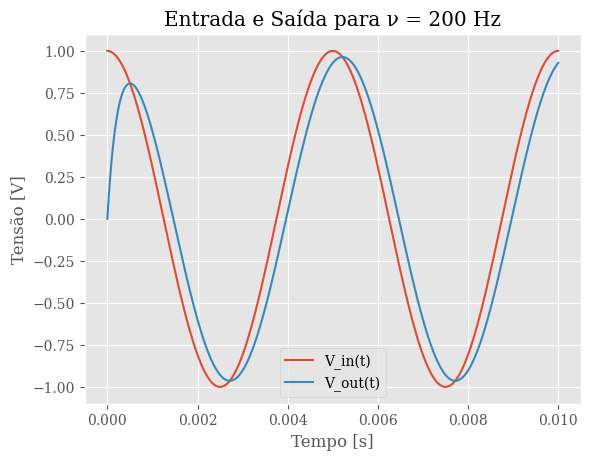

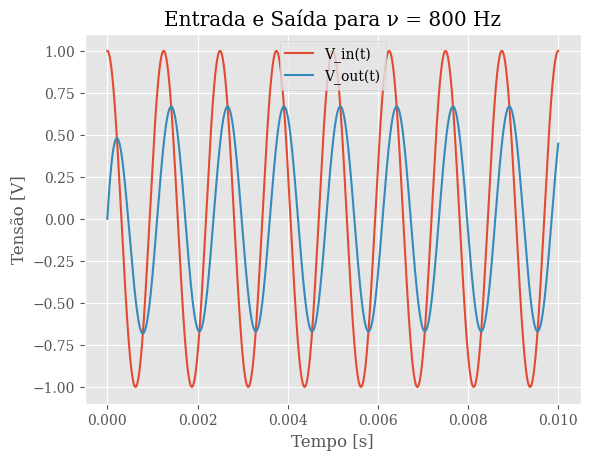

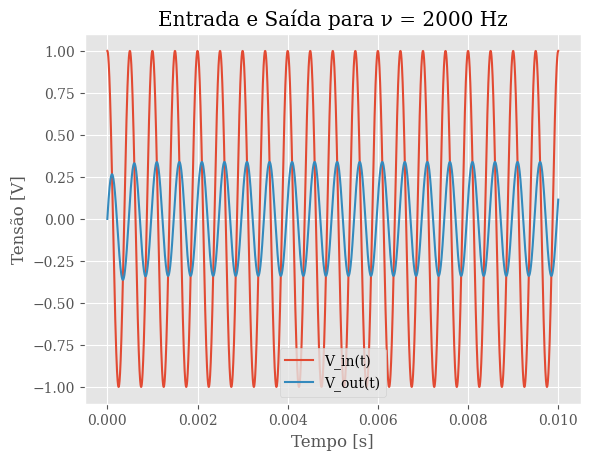

In [24]:
R = 4.7e3  #ohms
C = 47e-9  #farads

def Vin_sine(t, nu):
    return np.cos(2 * np.pi * nu * t)

#runge-kuta de 4 ordem
def rk4(f, V_out0, t, h):
    V_out = np.zeros_like(t)
    V_out[0] = V_out0
    for j in range(1, len(t)):
        k1 = h * f(V_out[j-1], t[j-1])
        k2 = h * f(V_out[j-1] + k1/2, t[j-1] + h/2)
        k3 = h * f(V_out[j-1] + k2/2, t[j-1] + h/2)
        k4 = h * f(V_out[j-1] + k3, t[j-1] + h)
        V_out[j] = V_out[j-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return V_out

def f(V_out, t, nu):
    return (Vin_sine(t, nu) - V_out) / (R * C)

nu_values = [200, 800, 2000]
ti = 0.0
tf = 0.01
h = 1e-6
N = int((tf - ti) / h)
t = np.linspace(ti, tf, N)
V_out0 = 0.0

results = {}
for nu in nu_values:
    V_out = rk4(lambda V_out, t: f(V_out, t, nu), V_out0, t, h)
    V_in = Vin_sine(t, nu)
    results[nu] = (V_in, V_out)

def calculate_rms(values):
    return np.sqrt(np.mean(values**2))

rms_results = {}
for nu, (V_in, V_out) in results.items():
    V_in_rms = calculate_rms(V_in)
    V_out_rms = calculate_rms(V_out)
    rms_results[nu] = (V_in_rms, V_out_rms)


def theoretical_rms(nu):
    X_C = 1 / (2 * np.pi * nu * C)
    return X_C / np.sqrt(R**2 + X_C**2)

for nu, (V_in_rms, V_out_rms) in rms_results.items():
    V_out_rms_theoretical = theoretical_rms(nu)
    print(f"Frequência: {nu} Hz")
    print(f"V_in RMS: {V_in_rms:.4f}")
    print(f"V_out RMS: {V_out_rms:.4f}")
    print(f"V_out RMS Teórico: {V_out_rms_theoretical:.4f}")
    print(f"Erro: {np.abs(V_out_rms - V_out_rms_theoretical):.4f}\n")

#Plot
for nu, (V_in, V_out) in results.items():
    plt.figure()
    plt.plot(t, V_in, label='V_in(t)')
    plt.plot(t, V_out, label='V_out(t)')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Tensão [V]')
    plt.title(f'Entrada e Saída para ν = {nu} Hz')
    plt.legend()
    plt.show()